In [40]:
!pip3 install networkx
!pip3 install matplotlib
!pip3 install numpy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installati

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
import re

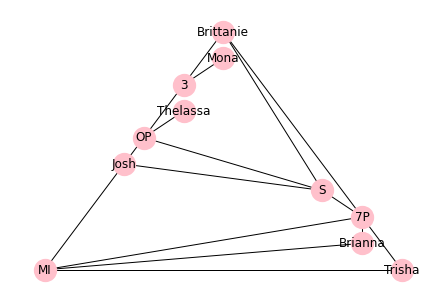

In [42]:
graph = nx.Graph()

graph.add_edges_from(
    [
        ("MI","7P"),("7P","S"),("S","OP"),("OP","3"),
        ("MI","Josh"), ("MI","Trisha"), ("MI","Brianna"),
        ("7P","Trisha"), ("7P","Brianna"), ("7P","Brittanie"),
        ("S","Josh"), ("S","Brittanie"),
        ("OP","Thelassa"),("OP","Josh"),
        ("3","Brittanie"),("3","Mona")
    ]
)
options = {
    "node_size": 300,
    "node_color": "pink",
    "linewidths": 6,
    "width": 1
}

nx.draw_planar(graph, **options, with_labels=True)
ax = plt.gca()
plt.axis("off")
plt.show()

In [43]:
ncmc = nx.Graph()

EDGES = """
RX - RAD
RX - OPI
RX - BURN
RX - 3NW
3NW - 3W
3NW - 4NW
3NW - CCU
BURN - CCU
3W - 4W
4W - 4NW
4W - 4SW1
4W - 4SW4
4SW4 - 4SW1
4SW1 - 4SW2
4SW2 - 4SW3
4SW4 - 4SW2
4SW3 - 4SW4
4SW1 - 4SW3
4SW1 - CCU
RX - LD
RX - PEDS
LD - PEDS
PEDS - NICU
PEDS - PPAR
LD - 3NW
PEDS - 3W
RX - OR
OR - 4SW4
OR - ED
ED - PPAR
PPAR - NICU
"""

EG = re.split("\n",EDGES)[1:-1]
TUPS = [tuple(re.split("\s-\s",x)) for x in EG]
TUPS

[('RX', 'RAD'),
 ('RX', 'OPI'),
 ('RX', 'BURN'),
 ('RX', '3NW'),
 ('3NW', '3W'),
 ('3NW', '4NW'),
 ('3NW', 'CCU'),
 ('BURN', 'CCU'),
 ('3W', '4W'),
 ('4W', '4NW'),
 ('4W', '4SW1'),
 ('4W', '4SW4'),
 ('4SW4', '4SW1'),
 ('4SW1', '4SW2'),
 ('4SW2', '4SW3'),
 ('4SW4', '4SW2'),
 ('4SW3', '4SW4'),
 ('4SW1', '4SW3'),
 ('4SW1', 'CCU'),
 ('RX', 'LD'),
 ('RX', 'PEDS'),
 ('LD', 'PEDS'),
 ('PEDS', 'NICU'),
 ('PEDS', 'PPAR'),
 ('LD', '3NW'),
 ('PEDS', '3W'),
 ('RX', 'OR'),
 ('OR', '4SW4'),
 ('OR', 'ED'),
 ('ED', 'PPAR'),
 ('PPAR', 'NICU')]

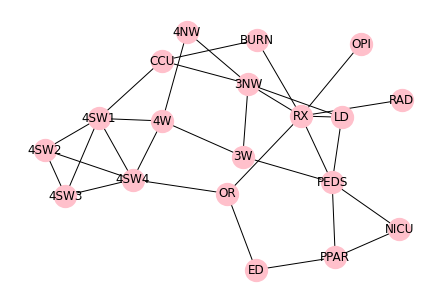

In [44]:
ncmc.add_edges_from(TUPS)
#nx.draw(ncmc,**options, with_labels=True)
nx.draw_kamada_kawai(ncmc,**options, with_labels=True)

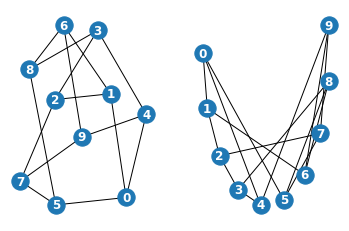

In [49]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold', font_color='white')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 9), range(17)], with_labels=True, font_weight='bold', font_color='white')

options = {
    'node_color': 'purple',
    'node_size': 200,
    'width': 2,
}


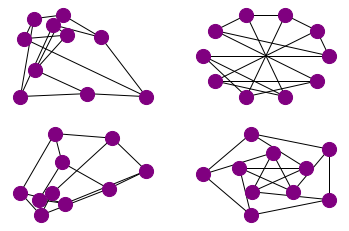

In [46]:

subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

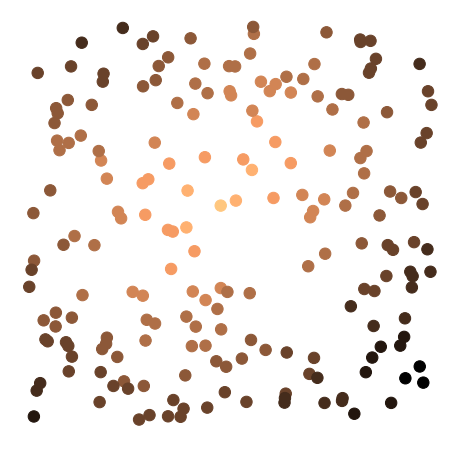

In [47]:
# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="white", width=1)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=130,
    node_color=list(p.values()),
    cmap=plt.cm.copper_r,
)
plt.figure(1,figsize=(2,1))
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()